In [5]:
%config StoreMagics.autorestore = True
%reset -f
# %store -z
%store -r
%whos

Variable           Type              Data/Info
----------------------------------------------
dvMathcalP         LinearIOSystem    <LinearIOSystem>: sys[59]<...>[[0. 0.]\n     [0. 0.]]\n
extMathcalP        LinearIOSystem    <LinearIOSystem>: sys[58]<...> [0. 0.]\n     [0. 0.]]\n
fullOrder          int               100
hsvDvMathcalP      ndarray           100: 100 elems, type `float64`, 800 bytes
hsvExtMathcalP     ndarray           100: 100 elems, type `float64`, 800 bytes
mathcalP_cb        LinearIOSystem    <LinearIOSystem>: sys[4]\<...>[[0. 0.]\n     [0. 0.]]\n
reducOrder         int               20
truncDvMathcalP    LinearIOSystem    <LinearIOSystem>: sys[61]<...>[[0. 0.]\n     [0. 0.]]\n
truncExtMathcalP   LinearIOSystem    <LinearIOSystem>: sys[60]<...> [0. 0.]\n     [0. 0.]]\n


In [6]:
import numpy
import sympy
import scipy
import control
import matplotlib.pyplot as plt

from custom_utils import ControlUtils
from custom_utils import ODEUtils

from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

numpy.set_printoptions(precision=3)
sympy.init_printing(use_latex='mathjax', use_unicode=True)
sympy.init_printing()
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica", "axes.titley": 1.0 } )
%matplotlib inline

In [7]:
# Get plant
normInfExtMathcalP = ControlUtils.hinfnorm(extMathcalP)
display(Math('\\lVert \\mathcal{P}_{ext} \\rVert_{\\infty} = ' + str(normInfExtMathcalP)))

<IPython.core.display.Math object>

In [8]:
# Simulate response
T_step = Tsam/100
t_ini = 0
t_fin = 5
steps = int(numpy.ceil((t_fin-t_ini)/T_step))

tkVec = numpy.arange(t_ini, t_fin, Tsam)[:, None]
tVec = numpy.linspace(t_ini, t_fin, steps)[:, None]
uVec = 1e-4*numpy.sin(2*numpy.pi*tVec/0.1)

xpVec, xcVec, vsVec, whVec = ODEUtils.solveSDLinearSystem(plant=extMathcalP,
                                                          discrete_controller=overlineMathcalC,
                                                          xp0=0*numpy.random.rand(*(extMathcalP.A.shape[0], 1)),
                                                          xc0=0*numpy.random.rand(*(overlineMathcalC.A.shape[0], 1)),
                                                          uVec=uVec, t_ini=t_ini, t_fin=t_fin, T_step=T_step, T_samps=tkVec)

NameError: name 'Tsam' is not defined

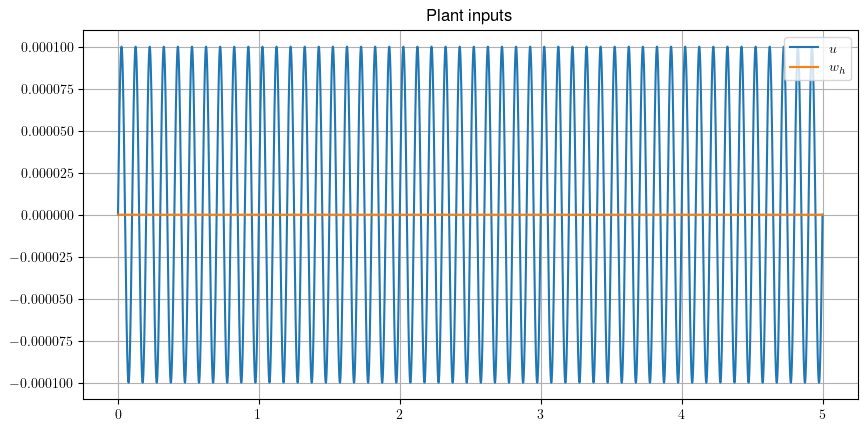

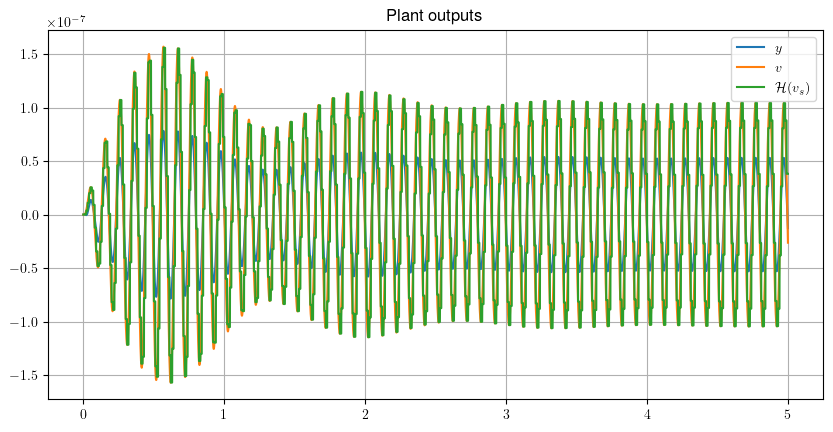

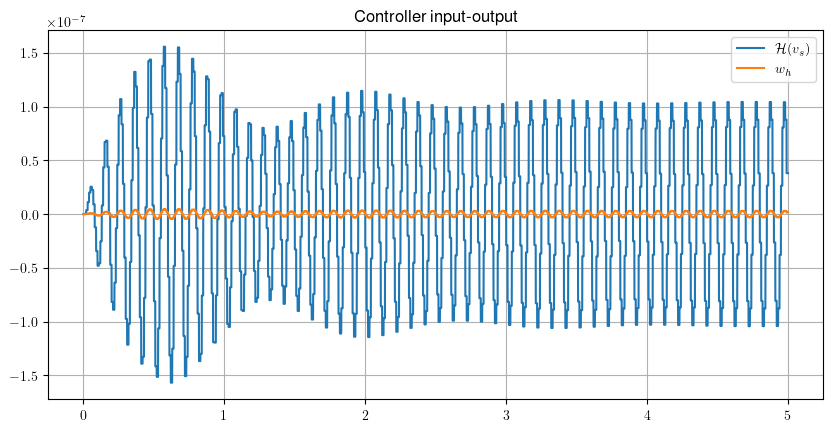

In [ ]:
# Compute plant outputs
yVec = extMathcalP.C[-1:,:] @ xpVec
vVec = extMathcalP.C[0:1,:] @ xpVec

tLims = [t_ini,t_fin]
ODEUtils.plot_inputs(tVec=tVec,tLims=tLims,uVec=uVec,whVec=whVec)
ODEUtils.plot_outputs(tVec=tVec,tLims=tLims,vsVec=vsVec,yVec=yVec,vVec=vVec)
ODEUtils.plot_controller_io(tVec=tVec,tLims=tLims,vsVec=vsVec,whVec=whVec)